# Question 1 [50 Points] A Simulation Study

Let's use a simulation study to confirm the bias-variance trade-off of linear regressions. Consider the following model. 

$$Y = \sum_j^p 0.8^j \times X_j + \epsilon$$

All the covariates and the error term follow i.i.d. standard Gaussian distribution. The true model involves all the variables; however, larger indexes do not significantly contribute to the variation. Hence, there could be a benefit in using a smaller subset for prediction purposes. Let's confirm that with a simulation study. 

  - Generate 100 samples of covariates $X$ with $p=30$ by the following code.
```{r}
set.seed(542)
n = 100
p = 30
b = 0.8^(1:p)
X = matrix(rnorm(n*p), n, p)
Ytrue = X %*% b
```

  - Then the study essentially **repeats** the following steps 100 times. Begin with another fixed random seed before your loop.
    - Using the fixed covariates $X$, generate 100 training outcomes $Y_{train}$ and 100 testing outcomes $Y_test$ independently.
    - Consider using only the first $j$ variables to fit the linear regression (**NO intercept term**). Let $j$ ranges from 1 to 30. Calculate and record the corresponding prediction error by comparing your prediction with the outcomes for testing data. 

**Without running the simulation**, for each $j$ value, we also have the theoretical decomposition of the testing error based on the lecture. Suppose you know the true model, covariates $X$ and the distribution of random noise.

  a) [15 pts]  Please calculate the bias^2 , variance (of the prediction) and testing error for each $j$ based on the theoretical formulas. Plot the 3 lines on the same figure,  using the `number of variables` as the x-axis and `bias^2`, `variance`, `theoretical testing error`  as the y-axis. Label each line.
   - $Bias^2 =  \frac{1}{n} \| E(Y_{pred} - Y_{true}) \|^2 = \| \mu-H\mu\|^2$, where $Y$ is a $n \times 1$ vector.
   - $Var =  \frac{1}{n} E \|(Y_{pred} - E(Y_{pred}) \|^2 = p \sigma^2$ .

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [2]:
np.random.seed(542)
n = 100
p = 30
X = np.random.normal(size=(n,p))
b = np.array([np.power(0.8, j) for j in np.arange(p)])
Y_true = X @ b
theoretical_biases = []
theoretical_variances = []
theoretical_test_errors = []

e = np.random.normal(size=n)
e_star = np.random.normal(size=n)
Y_train = Y_true + e
Y_test = Y_true + e_star
test_es = []
for j in range(30):
    X_sub = X[:,:j+1]
    beta_hat = np.linalg.inv(X_sub.T @ X_sub) @ X_sub.T @ Y_train
    preds = X_sub @ beta_hat
    H = X_sub @ np.linalg.inv(X_sub.T @ X_sub) @ X_sub.T
    bias = np.sum(np.power(Y_true - H @ Y_true,2))/n
    variance = (j+1)/n
    test_error = (bias + variance + 1)
    theoretical_biases.append(bias)
    theoretical_variances.append(variance)
    theoretical_test_errors.append(test_error)

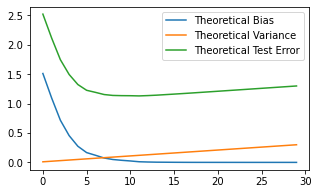

In [3]:
fig, ax = plt.subplots(figsize=(5, 3))
plt.plot(theoretical_biases, label='Theoretical Bias')
plt.plot(theoretical_variances, label='Theoretical Variance')
plt.plot(theoretical_test_errors, label='Theoretical Test Error')
ax.legend(loc='upper right')
plt.show()

b) [5 pts] Report the theoretical testing error with $p = 30$, $\frac{1}{n}E \|Y_{test} - Y_{pred} \|^2$.

In [4]:
print(f'Theoretical Testing Error when p=30: {theoretical_test_errors[29]}') 

Theoretical Testing Error when p=30: 1.3


**After finishing the simulation**:

c)  [20 pts]  Perform the simulation. Report the averaged (empirical) prediction error with $p = 30$. Note that 100 times simulation approximates the $E$ operation. Plot `pred err` in the **same figure** of question a. Label your line. Does your empirical testing error match our theoretical analysis? Comment on your findings.

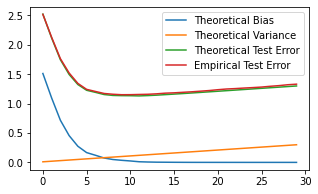

Theoretical Testing Error when p=30: 1.3
Empirical Testing Error when p=30: 1.3306052683421083


In [5]:
empirical_test_errors = []
bias_results = []
preds = []
np.random.seed(543)

for i in range(100):
    e = np.random.normal(size=n)
    e_star = np.random.normal(size=n)
    Y_train = Y_true + e
    Y_test = Y_true + e_star
    test_es = []
    for j in range(30):
        X_sub = X[:,:j+1]
        beta_hat = np.linalg.inv(X_sub.T @ X_sub) @ X_sub.T @ Y_train
        pred = X_sub @ beta_hat
        e = np.mean(np.power((pred-Y_test),2))
        test_es.append(e)  
        
        if(j==4): # when p=5
            preds.append(pred-Y_true)
    empirical_test_errors.append(test_es) 
    
empirical_test_errors = np.mean(np.array(empirical_test_errors), axis=0)

fig, ax = plt.subplots(figsize=(5, 3))
plt.plot(theoretical_biases, label='Theoretical Bias')
plt.plot(theoretical_variances, label='Theoretical Variance')
plt.plot(theoretical_test_errors, label='Theoretical Test Error')
plt.plot(empirical_test_errors, label='Empirical Test Error')
ax.legend(loc='upper right')
plt.show()
print(f'Theoretical Testing Error when p=30: {theoretical_test_errors[29]}') 
print(f'Empirical Testing Error when p=30: {empirical_test_errors[29]}')

It looks like the theoretical results match very closely to empirical results. 

d)  [10 pts]  Evaluate the bias^2 for model $p=5$ without theoretical formulas. You can still assume you know the true outcomes while using the average results to approximate the $E$ operation. Compare the empirical value with the theoretical one.

In [6]:
preds = np.array(preds)
preds = preds.mean(axis=0)
preds = np.mean(np.power(preds, 2))
print(f'When p=30, empirical bias is: {preds}')
print(f'When p=30, theoretical bias is: {preds}')

When p=30, empirical prediction error is: 0.2745366307660059
When p=30, theoretical prediction error is: 0.2745366307660059


The emprical and theoretical results are very similar. 

## Question 2 [50 Points] Bitcoin price prediction

For this question, we will use the [Bitcoin data]() provided on the course website. The data were posted originally on Kaggle ([link](https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=bitcoin_cash_price.csv)). Make sure that you read relevant information from the Kaggle website. Our data is the `bitcoin_dataset.csv` file. You should use a training/testing split such that your training data is constructed using only information up to 12/31/2016, and your testing data is constructed using only information starting from 01/01/2017. The goal of our analysis is to predict the `btc_market_price`. Since this is longitudinal data, we will use the information from previous days to predict the market price at a future day. In particular, on each calendar day (say, day 1), we use the information from three days onward (days 1, 2, and 3) to predict the market price on the 7th day. 

Hence you need to first reconstruct the data properly to fit this purpose. This is mainly to put the outcome (of day 7) and the covariates (of the previous days) into the same row. Note that you may face missing data, categorical predictors, outliers, scaling issues, computational issues, and maybe others for this question. Use your best judgment to deal with them. There is no general ``best answer''. Hence the grading will be based on whether you provided reasoning for your decision and whether you carried out the analysis correctly.

a.  [25 Points] Data Construction. Data pre-processing is usually the most time-consuming and difficult part of an analysis. We will use this example as a practice. Construct your data appropriately such that further analysis can be performed. Make sure that you consider the following:

    * The data is appropriate for our analysis goal: each row contains the outcome on the seventh day and the covariates based on the first three days. The covariates are not limited to the price.
    * Missing data is addressed (you can remove variables, remove observations, impute values or propose your own method)
    * You may process the covariates and/or outcome by considering centering, scaling, transformation, removing outliers, etc. However, these are your choice. 
  
For each of the above tasks, make sure that you **clearly document your choice**. In the end, provide a summary table/figure of your data. You can consider using boxplots, quantiles, histograms, or any method that is easy for readers to understand. You are required to pick at least one method to present. 

```{r}
# bitcoin = read.csv(file = "bitcoin.csv")
# head(bitcoin)
```

For pre processing, I dropped all the rows that had missing values. I didn't do any other processing. 

In [7]:
bitcoin_df = pd.read_csv('./bitcoin.csv')
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])
start_date = '2016-12-31'
train_mask = (bitcoin_df['Date'] <= start_date)
test_mask = (bitcoin_df['Date'] > start_date)
train_bitcoin_df = bitcoin_df.loc[train_mask]
test_bitcoin_df = bitcoin_df.loc[test_mask]

train_bitcoin_df = train_bitcoin_df.dropna()
test_bitcoin_df = test_bitcoin_df.dropna()

X_train_raw = np.array(train_bitcoin_df)
X_test_raw = np.array(test_bitcoin_df)

X_train = []
Y_train = []
for i, row in enumerate(X_train_raw):
    if(i+6>=X_train_raw.shape[0]):
        break
    ith_example = X_train_raw[i, :]
    ith_plus1_example = X_train_raw[i+1,:]
    ith_plus2_example = X_train_raw[i+2,:]
    ith_plus7_example = X_train_raw[i+6,:]
    covariates = np.vstack((ith_example, ith_plus1_example, ith_plus2_example)).reshape((-1,1)).squeeze(axis=1)
    X_train.append(covariates)
    Y_train.append(ith_plus7_example[1])
    
X_test = []
Y_test = []
for i, row in enumerate(X_test_raw):
    if(i+6>=X_test_raw.shape[0]):
        break
    ith_example = X_test_raw[i, :]
    ith_plus1_example = X_test_raw[i+1,:]
    ith_plus2_example = X_test_raw[i+2,:]
    ith_plus7_example = X_test_raw[i+6,:]
    covariates = np.vstack((ith_example, ith_plus1_example, ith_plus2_example)).reshape((-1,1)).squeeze(axis=1)
    X_test.append(covariates)
    Y_test.append(ith_plus7_example[1])
    
#Initialization variables
cols = []
for i in range(3):
    for column in train_bitcoin_df.columns:
        cols.append(column+" "+str(i))

X_train = pd.DataFrame(X_train, columns = cols)
X_train = X_train.drop(columns=['Date 0', 'Date 1', 'Date 2'])
Y_train = np.array(Y_train)

X_test = pd.DataFrame(X_test, columns = cols)
X_test = X_test.drop(columns=['Date 0', 'Date 1', 'Date 2'])
Y_test = np.array(Y_test)

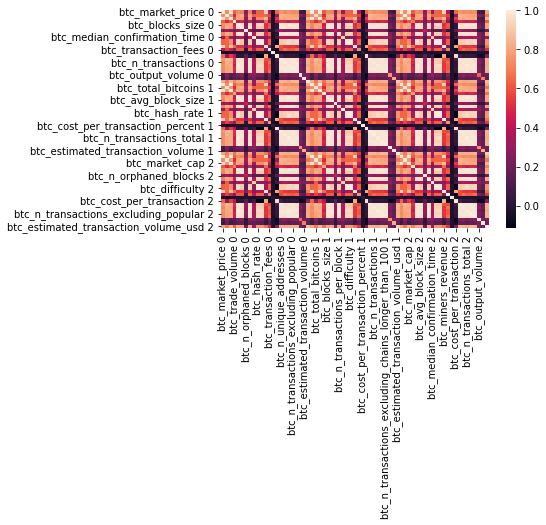

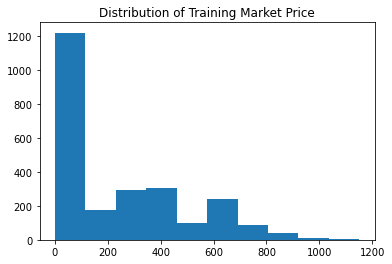

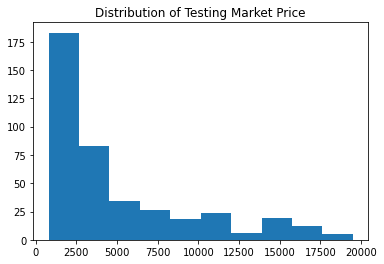

In [8]:
corr = X_train.corr()
sns.heatmap(corr)
plt.show()
plt.hist(Y_train)
plt.title("Distribution of Training Market Price")
plt.show()
plt.hist(Y_test)
plt.title("Distribution of Testing Market Price")
plt.show()

The first figure shows the corelation between the variables. There is a lot of light colored squres indicating that many of the variables are highly corelated. Next is the distributions of the response variable for training and testing. Both distributions have long tails on the right. The testing data clearly has much higher response variables. This is because the testing data is taken after 2016. Before that bitcoin prices were much lower, but in more recent times, the price has increased significantly. 

b.  [20 Points] Model Selection Criterion. Use AIC and BIC criteria to select the best model and report the result from each of them. Use the forward selection for AIC and backward selection for BIC. Report the following mean squared error from **both training and testing data**. 

    * The mean squared error: $$n^{-1} \sum_{i}(Y_i - \widehat{Y}_i)^2$$
    * Since these quantities can be affected by scaling and transformation, make sure that you **state any modifications applied to the outcome variable**. Compare the training data errors and testing data errors. Which model works better? Provide a summary of your results. 

In [9]:
def aic_scorer(model, X, Y):
    n = np.shape(X)[0]
    p = np.shape(X)[1]
    MSE = mean_squared_error(Y,model.predict(X))
    RSS = MSE * n
    return n*np.log(RSS/n) + 2*p

sfs_forward = SequentialFeatureSelector(LinearRegression(fit_intercept=True), n_features_to_select=40, scoring=aic_scorer)
sfs_forward.fit(X_train, Y_train)

forward_training_subset = sfs_forward.transform(X_train)
forward_testing_subset = sfs_forward.transform(X_test)
forward_linear_model = LinearRegression(fit_intercept=True)
forward_linear_model.fit(forward_training_subset, Y_train)

forward_training_preds = forward_linear_model.predict(forward_training_subset)
forward_testing_preds = forward_linear_model.predict(forward_testing_subset)

forward_training_mse = mean_squared_error(Y_train, forward_training_preds)
forward_testing_mse = mean_squared_error(Y_test, forward_testing_preds)

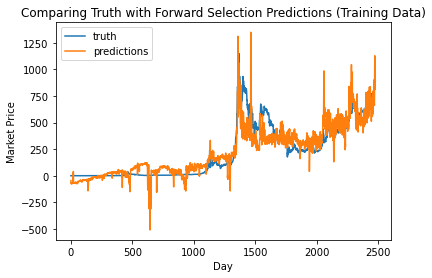

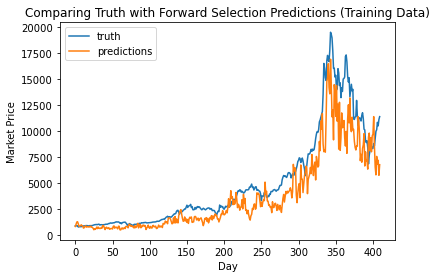

Forward Selection w/ AIC Training MSE: 13267.612724865996
Forward Selection w/ AIC Testing MSE: 4222976.271279497


In [10]:
plt.plot(Y_train, label='truth')
plt.plot(forward_training_preds, label='predictions')
plt.legend()
plt.title('Comparing Truth with Forward Selection Predictions (Training Data)')
plt.xlabel('Day')
plt.ylabel('Market Price')
plt.show()

plt.plot(Y_test, label='truth')
plt.plot(forward_testing_preds, label='predictions')
plt.legend()
plt.title('Comparing Truth with Forward Selection Predictions (Training Data)')
plt.xlabel('Day')
plt.ylabel('Market Price')
plt.show()

print(f'Forward Selection w/ AIC Training MSE: {forward_training_mse}')
print(f'Forward Selection w/ AIC Testing MSE: {forward_testing_mse}')

In [11]:
def bic_scorer(model, X, Y):
    n = np.shape(X)[0]
    p = np.shape(X)[1]
    MSE = mean_squared_error(Y,model.predict(X))
    RSS = MSE * n
    return n*np.log(RSS/n) + np.log(n)*p

sfs_backward = SequentialFeatureSelector(LinearRegression(fit_intercept=True), n_features_to_select=40, scoring=bic_scorer, direction='backward')
sfs_backward.fit(X_train, Y_train)

backward_training_subset = sfs_backward.transform(X_train)
backward_testing_subset = sfs_backward.transform(X_test)
backward_linear_model = LinearRegression(fit_intercept=True)
backward_linear_model.fit(backward_training_subset, Y_train)

backward_training_preds = backward_linear_model.predict(backward_training_subset)
backward_testing_preds = backward_linear_model.predict(backward_testing_subset)

backward_training_mse = mean_squared_error(Y_train, backward_training_preds)
backward_testing_mse = mean_squared_error(Y_test, backward_testing_preds)

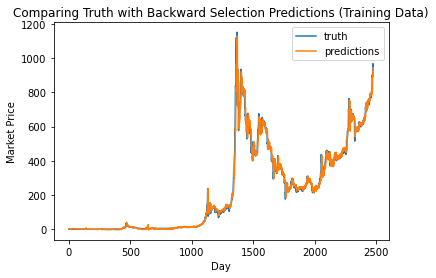

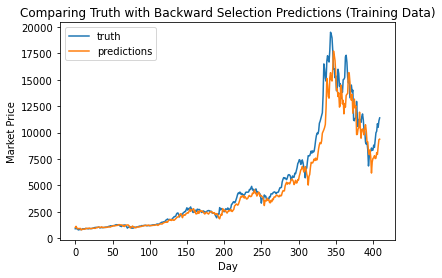

Backward Selection w/ BIC Training MSE: 871.3359719989727
Backward Selection w/ BIC Testing MSE: 1237892.471781891


In [12]:
plt.plot(Y_train, label='truth')
plt.plot(backward_training_preds, label='predictions')
plt.legend()
plt.title('Comparing Truth with Backward Selection Predictions (Training Data)')
plt.xlabel('Day')
plt.ylabel('Market Price')
plt.show()

plt.plot(Y_test, label='truth')
plt.plot(backward_testing_preds, label='predictions')
plt.legend()
plt.title('Comparing Truth with Backward Selection Predictions (Training Data)')
plt.xlabel('Day')
plt.ylabel('Market Price')
plt.show()

print(f'Backward Selection w/ BIC Training MSE: {backward_training_mse}')
print(f'Backward Selection w/ BIC Testing MSE: {backward_testing_mse}')

It seems that our backward selection method worked better at fitting the model based on the plots. The MSE results are as follow:
- Forward Selection w/ AIC Training MSE: 13267.612724865996
- Forward Selection w/ AIC Testing MSE: 4222976.271279497
- Backward Selection w/ BIC Training MSE: 871.3359719989727
- Backward Selection w/ BIC Testing MSE: 1237892.471781891
The train and test MSE was better for the backward selection, agreeing with the plots.

c.  [10 Points] Best Subset Selection. Fit the best subset selection to the dataset and report the best model of each model size (up to 7 variables, excluding the intercept) and their prediction errors. Make sure that you simplify your output to only present the essential information. If the algorithm cannot handle this many variables, then consider using just day 1 and 2 information. You can use `leaps` package for subset selection.

In order to run this method on my computer, I used information from only two of the days instead of three. I also was not able to run this on my machine with more than 3 variables, therefore I report here the best model for three features. The scoring metric I used was R^2. Instead of the leaps package, I used mlxtend.

In [13]:
bitcoin_df = pd.read_csv('./bitcoin.csv')

bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])
start_date = '2016-12-31'
train_mask = (bitcoin_df['Date'] <= start_date)
test_mask = (bitcoin_df['Date'] > start_date)
train_bitcoin_df = bitcoin_df.loc[train_mask]
test_bitcoin_df = bitcoin_df.loc[test_mask]

train_bitcoin_df = train_bitcoin_df.dropna()
test_bitcoin_df = test_bitcoin_df.dropna()

X_train_raw = np.array(train_bitcoin_df)
X_test_raw = np.array(test_bitcoin_df)

X_train = []
Y_train = []
for i, row in enumerate(X_train_raw):
    if(i+6>=X_train_raw.shape[0]):
        break
    ith_example = X_train_raw[i, :]
    ith_plus1_example = X_train_raw[i+1,:]
    #ith_plus2_example = X_train_raw[i+2,:]
    ith_plus7_example = X_train_raw[i+6,:]
    covariates = np.vstack((ith_example, ith_plus1_example)).reshape((-1,1)).squeeze(axis=1)
    X_train.append(covariates)
    Y_train.append(ith_plus7_example[1])
    

X_test = []
Y_test = []
for i, row in enumerate(X_test_raw):
    if(i+6>=X_test_raw.shape[0]):
        break
    ith_example = X_test_raw[i, :]
    ith_plus1_example = X_test_raw[i+1,:]
    #ith_plus2_example = X_test_raw[i+2,:]
    ith_plus7_example = X_test_raw[i+6,:]
    covariates = np.vstack((ith_example, ith_plus1_example)).reshape((-1,1)).squeeze(axis=1)
    X_test.append(covariates)
    Y_test.append(ith_plus7_example[1])
    
#Initialization variables
cols = []
for i in range(2):
    for column in train_bitcoin_df.columns:
        cols.append(column+" "+str(i))

X_train = pd.DataFrame(X_train, columns = cols)
X_train = X_train.drop(columns=['Date 0', 'Date 1'])

Y_train = np.array(Y_train)


X_test = pd.DataFrame(X_test, columns = cols)
X_test = X_test.drop(columns=['Date 0', 'Date 1'])

Y_test = np.array(Y_test)

In [14]:
efs = EFS(LinearRegression(fit_intercept = True), 
           min_features=1,
           max_features=3,
           scoring='r2',
           print_progress=True,n_jobs=-1)

efs = efs.fit(X_train, Y_train)

Features: 16261/16261

features used:
['btc_market_cap 0', 'btc_n_transactions_total 0', 'btc_market_price 1']


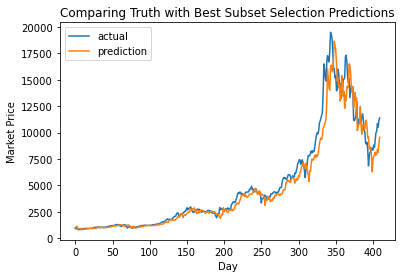

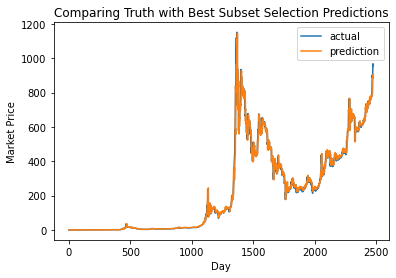

Best Subset Selection w/ R2 Training MSE: 1096.7247029283133
Best Subset Selection w/ R2 Testing MSE: 1130867.0140229072


In [15]:
best_subset_model_features = list(efs.best_feature_names_)
best_subset_model = LinearRegression(fit_intercept=True)
best_subset_model.fit(X_train[best_subset_model_features], Y_train)

best_subset_train_preds = best_subset_model.predict(X_train[best_subset_model_features])
best_subset_test_preds = best_subset_model.predict(X_test[best_subset_model_features])

best_subset_train_mse = mean_squared_error(best_subset_train_preds, Y_train)
best_subset_test_mse = mean_squared_error(best_subset_test_preds, Y_test)

print('features used:')
print(best_subset_model_features)

plt.plot(Y_test, label='actual')
plt.plot(best_subset_test_preds, label='prediction')
plt.legend()
plt.title('Comparing Truth with Best Subset Selection Predictions')
plt.xlabel('Day')
plt.ylabel('Market Price')
plt.show()

plt.plot(Y_train, label='actual')
plt.plot(best_subset_train_preds, label='prediction')
plt.legend()
plt.title('Comparing Truth with Best Subset Selection Predictions')
plt.xlabel('Day')
plt.ylabel('Market Price')
plt.show()

print(f'Best Subset Selection w/ R2 Training MSE: {best_subset_train_mse}')
print(f'Best Subset Selection w/ R2 Testing MSE: {best_subset_test_mse}')

The plots above show the training and testing predictions compared to the truth for the best subset.

For 1 feature, the best subset was ('btc_market_price 1',), with R2:0.6567007227174585, train MSE:1118.1280584181948, and test MSE:1013511.8226417648

For 2 feature, the best subset was ('btc_market_price 1', 'btc_n_transactions_total 1'), with R2:0.824241726290307, train MSE:1102.9920013360259, and test MSE:1023261.9309282679

For 3 feature, the best subset was ('btc_market_cap 0', 'btc_n_transactions_total 0', 'btc_market_price 1'), with R2:0.9035138732466976, train MSE:1096.7247029283133, and test MSE:1130867.0140229072



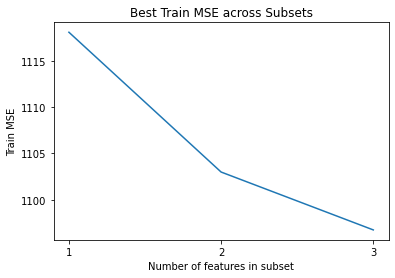

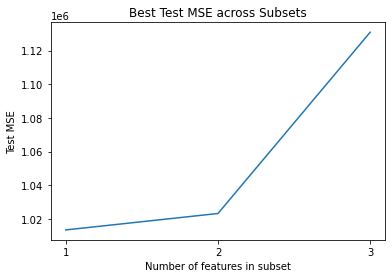

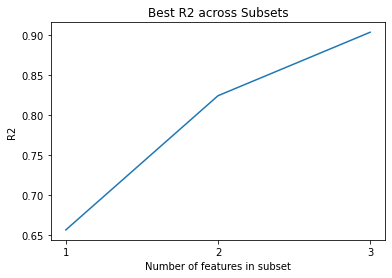

In [19]:
best_results ={}

for key in efs.subsets_:
    num_features = len(efs.subsets_[key]['feature_names'])
    if(num_features in best_results.keys()):
        best_results[num_features].append((efs.subsets_[key]['feature_names'],efs.subsets_[key]['avg_score']))
    else:
        best_results[num_features] = [(efs.subsets_[key]['feature_names'],efs.subsets_[key]['avg_score'])]
best_results2 = {}

for key in best_results:
    highest = -np.inf
    highest_sub = None

    for item in best_results[key]:
        if(item[1]>highest):
            highest = item[1]
            highest_sub = item[0]
    model_ = LinearRegression(fit_intercept=True)
    best_subset_model_features = list(highest_sub)
   
    best_subset_model.fit(X_train[list(highest_sub)], Y_train)
    train_preds = best_subset_model.predict(X_train[list(highest_sub)])
    test_preds = best_subset_model.predict(X_test[list(highest_sub)])
    train_mse = mean_squared_error(train_preds, Y_train)
    test_mse = mean_squared_error(test_preds, Y_test)
    best_results2[len(highest_sub)] = {
        'features': highest_sub,
        'r2': highest,
        'train_mse': train_mse,
        'test_mse': test_mse
    }
train_mses = []
r2s = []
test_mses = []

for key in best_results2:
    subset = best_results2[key]['features']
    r2 = best_results2[key]['r2']
    train_mse = best_results2[key]['train_mse']   
    test_mse = best_results2[key]['test_mse']
    r2s.append(r2)
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    print(f'For {key} feature, the best subset was {subset}, with R2:{r2}, train MSE:{train_mse}, and test MSE:{test_mse}\n')
    
plt.plot([1,2,3],train_mses)
plt.title('Best Train MSE across Subsets')
plt.xlabel('Number of features in subset')
plt.ylabel('Train MSE')
plt.xticks([1,2,3])
plt.show()
plt.plot([1,2,3],test_mses)
plt.title('Best Test MSE across Subsets')
plt.xlabel('Number of features in subset')
plt.ylabel('Test MSE')
plt.xticks([1,2,3])
plt.show()
plt.plot([1,2,3],r2s)
plt.title('Best R2 across Subsets')
plt.xlabel('Number of features in subset')
plt.ylabel('R2')
plt.xticks([1,2,3])
plt.show()
    

As we can see, the R2 goes up as we increase the number of variables in the best subset. Here, when we have the best 3 variables, the R2 is 0.904. The train mse's also go down as we add more variables in the best subset. 